"""
# Exploring a Family of Chaotic Maps

This simulation investigates a two-dimensional discrete map defined by:

    yₙ₊₁ = yₙ - b * sin(2πxₙ)
    xₙ₊₁ = (xₙ + a * (1 - yₙ²)) mod 1

**Interpretation:**
- **X-axis (Angle):** The variable \( x \) represents an angle and is confined to the interval \([0, 1)\) via the modulo operation.
- **Y-axis (Momentum-like):** The variable \( y \) is a momentum or action variable that is updated based on a nonlinear (quadratic) function of \( y \) and a sinusoidal term in \( x \).

**Physical Insights:**
- The parameter **\( a \)** controls the strength of the term \( a\,(1 - y^2) \) that updates \( x \). Changes in \( a \) modify the overall shift in the angle.
- The parameter **\( b \)** scales the sinusoidal perturbation in the \( y \) update. When **\( b = 0 \)**, \( y \) remains constant and the dynamics are regular. For nonzero \( b \), the coupling between \( x \) and \( y \) introduces nonlinearities that can lead to chaotic behavior.
- By exploring different pairs of \((a, b)\), we can observe how these parameters influence the structure of phase space, revealing transitions from regular to chaotic motion.

The class below encapsulates this simulation and provides a method to create a grid of subplots for multiple parameter sets.
"""

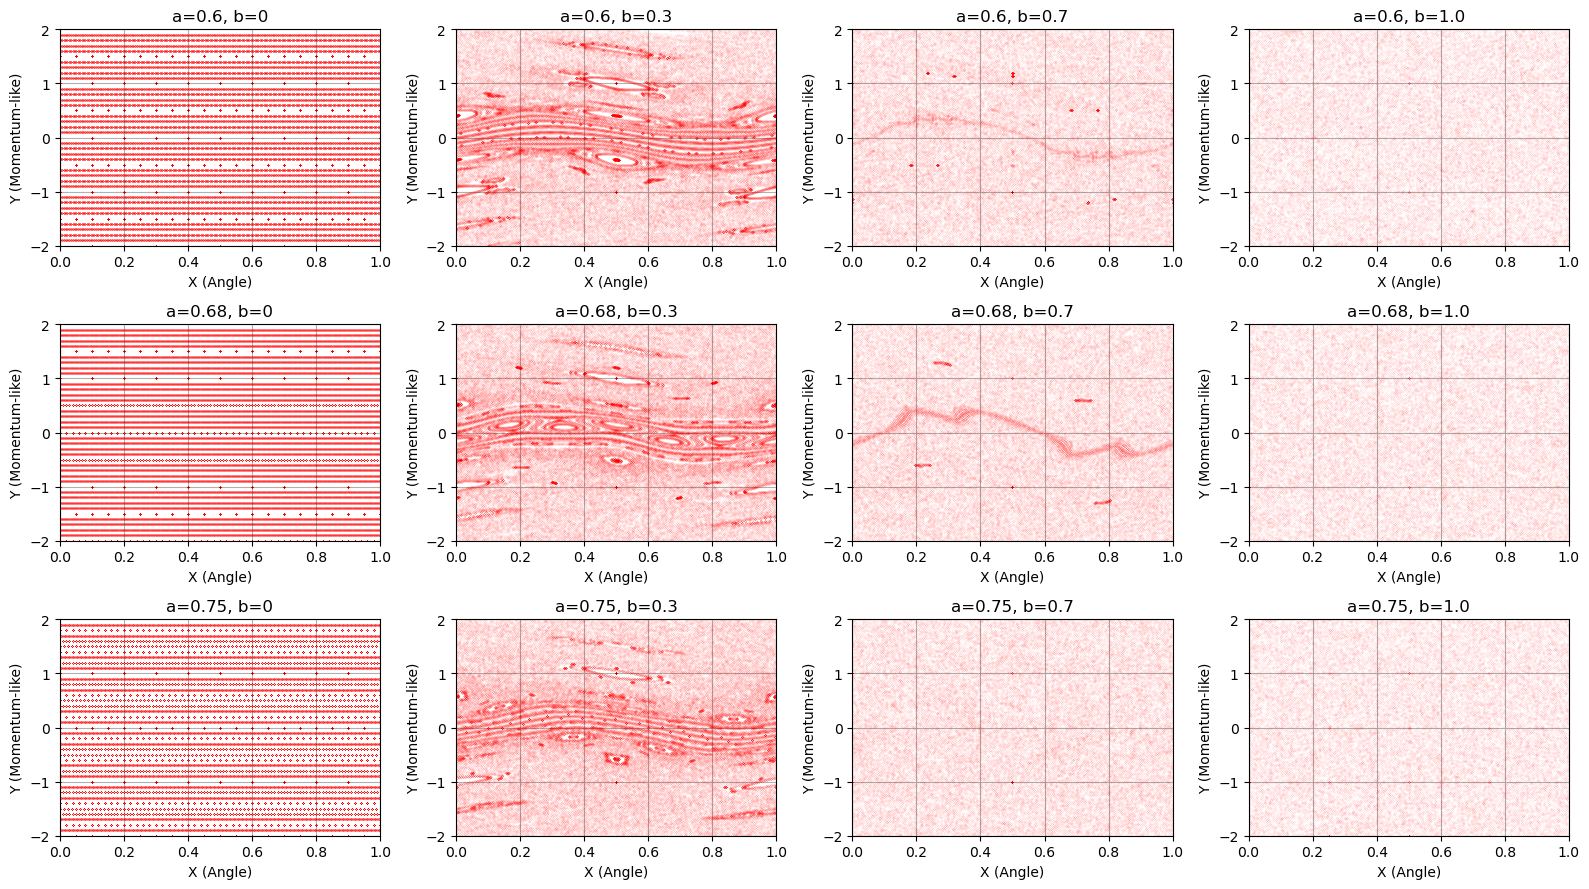

In [3]:


import numpy as np
import matplotlib.pyplot as plt

class ChaosMapExplorer:
    def __init__(self, NX=10, NY=40, n_iter=500):
        """
        Initialize the simulation parameters.
        
        Parameters:
            NX (int): Number of initial x values (x will be spaced in [0,1) with step 1/NX).
            NY (int): Number of initial y values. Initial y values will span approximately [-2,2].
            n_iter (int): Number of iterations to perform for each trajectory.
        """
        self.NX = NX
        self.NY = NY
        self.n_iter = n_iter

    def simulate_map(self, a, b):
        """
        Simulate the map for given parameters a and b.
        
        Returns:
            X, Y (lists): Lists containing the x and y values for all iterations over all initial conditions.
        """
        X = []
        Y = []
        for k in range(self.NY):
            for i in range(self.NX):
                # Initialization: x in [0,1) and y scaled to [-2, 2]
                x = i / self.NX
                y = (k / self.NY) * 4 - 2
                X.append(x)
                Y.append(y)
                for j in range(self.n_iter - 1):
                    y = y - b * np.sin(2 * np.pi * x)
                    x = (x + a * (1 - y**2)) % 1
                    X.append(x)
                    Y.append(y)
        return X, Y

    def plot_map(self, a, b, markersize=0.05, zoom=False, ax=None):
        """
        Plot the phase-space portrait for a given set of parameters a and b.
        
        Parameters:
            a (float): Parameter a.
            b (float): Parameter b.
            markersize (float): Size of the markers for the plot.
            zoom (bool): If True, set axis limits to zoom into the region [0,1] for x and [-2,2] for y.
            ax (matplotlib.axes.Axes): Axis to plot on. If None, a new figure is created.
        """
        X, Y = self.simulate_map(a, b)
        if ax is None:
            plt.figure(figsize=(8, 6))
            ax = plt.gca()
        ax.plot(X, Y, 'r.', markersize=markersize)
        ax.set_title(f"a={a}, b={b}")
        ax.set_xlabel("X (Angle)")
        ax.set_ylabel("Y (Momentum-like)")
        if zoom:
            ax.set_xlim(0.0, 1.0)
            ax.set_ylim(-2.0, 2.0)
        ax.grid(True)

    def run_exploration(self, a_values, b_values, markersize=0.05, zoom=False):
        """
        Create a grid of subplots to explore the phase-space portraits for multiple sets of parameters.
        
        Parameters:
            a_values (list or array): List of a values to explore.
            b_values (list or array): List of b values to explore.
            markersize (float): Marker size for the plot.
            zoom (bool): Whether to zoom in on the region [0,1] in x and [-2,2] in y.
        """
        n_rows = len(a_values)
        n_cols = len(b_values)
        fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows), squeeze=False)
        for i, a in enumerate(a_values):
            for j, b in enumerate(b_values):
                self.plot_map(a, b, markersize=markersize, zoom=zoom, ax=axs[i][j])
        plt.tight_layout()
        plt.show()

# Example usage:
if __name__ == '__main__':
    # Define a range of a and b values to explore.
    a_values = [0.60, 0.68, 0.75]
    b_values = [0, 0.3, 0.7, 1.0]
    
    explorer = ChaosMapExplorer(NX=10, NY=40, n_iter=500)
    explorer.run_exploration(a_values, b_values, markersize=0.05, zoom=True)